# Продвинутое машинное обучение: ДЗ 3

Студент: Бакулев Владимир Леонидович

Группа: MADE-DS-22

Почта: vlbakulev@gmail.com

In [1]:
import re
import operator
from collections import Counter
from copy import copy
import random

import numpy as np
import pandas as pd
import seaborn as sns
from nltk import ngrams

from tqdm.notebook import tqdm

from matplotlib import pyplot as plt
%matplotlib inline

### Задание 1

Реализуйте базовый частотный метод по Шерлоку Холмсу:
- подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
- возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
- расшифруйте их таким частотным методом.

##### Решение

Дешифровальный словарь:
- ключи: отсортированный по частоте употребления список символов в тестовом тексте
- значения: отсортированный по частоте употребления список символов в большом тексте (Война и мир)

In [2]:
ABC = ' абвгдеёжзийклмнопрстуфхцчшщъыьэюя'

WAR_AND_PEACE_PATH = './texts/WarAndPeace.txt'
ANNA_KARENINA_PATH = './texts/AnnaKarenina.txt'
ANY_TEXT_PATH = './texts/part_from_Dovlatov_Nashy.txt'

In [3]:
def prepare_text(text_path):
    """
    Считываем текст, после чего удаляем из текста табуляцию, переносы, 
    знаки препинания и приводим все к нижнему регистру
    """
    clean_text = ''
    with open(text_path, 'r') as fin:
        for line in fin:
            line_without_punctuation = re.sub(r"\W+", " ", line.lower())
            char_in_abc = ''.join([char for char in line_without_punctuation if char in list(ABC)])
            clean_text = ''.join([clean_text, char_in_abc])
    return clean_text

def calculate_ngramm(text, count_char_in_ngramm=1):
    text_in_ngramm = [''.join(gram) for gram in ngrams(text, count_char_in_ngramm)]
    counter_ngramm = dict(Counter(list(text_in_ngramm)))
    sorted_counter_ngramm = dict(sorted(
        counter_ngramm.items(), 
        key=operator.itemgetter(1),
        reverse=True
    ))
    return sorted_counter_ngramm

In [4]:
def encrypt_text(text, key_dict):
    _encrypt_text = []
    for char in list(text):
        _encrypt_text += key_dict[char]
    return ''.join(_encrypt_text)

In [5]:
war_and_peace = prepare_text(WAR_AND_PEACE_PATH)
any_text = prepare_text(ANY_TEXT_PATH)
anna_karenina = prepare_text(ANNA_KARENINA_PATH)

In [6]:
crypt_ABC = 'фадщоезкжятьнюйэёъпвчцлысрбугхиш м'
encrypt_dict = dict(zip(ABC, crypt_ABC))
# decrypt_dict = dict(zip(crypt_ABC, ABC))

In [7]:
print(any_text)

дед исаак очень много ел батоны разрезал не поперек а вдоль в гостях бабка рая постоянно за него краснела прежде чем идти в гости дед обедал это не помогало куски хлеба он складывал пополам водку пил из бокала для крем соды во время десерта просил не убирать заливное вернувшись домой с облегчением ужинал 


In [8]:
encrypt_any_text = encrypt_text(any_text, key_dict=encrypt_dict)
print(encrypt_any_text)

езефтваанфёрзэифйэёоёфзюфдачёэхфпаяпзяаюфэзфъёъзпзнфафщеёюифщфоёвчмыфдаднафпамфъёвчёмээёфяафэзоёфнпавэзюафъпзжезфрзйфтечтфщфоёвчтфезефёдзеаюфшчёфэзфъёйёоаюёфнцвнтфыюздафёэфвнюаехщаюфъёъёюайфщёенцфътюфтяфдёнаюафеюмфнпзйфвёехфщёфщпзймфезвзпчафъпёвтюфэзфцдтпачифяаютщэёзфщзпэцщбтвифеёйёьфвфёдюзорзэтзйфцжтэаюф


In [9]:
war_and_peace_count_1gramm = calculate_ngramm(war_and_peace, count_char_in_ngramm=1)
any_text_count_1gramm = calculate_ngramm(encrypt_any_text, count_char_in_ngramm=1)

In [10]:
sorted_1gram_in_war_and_peace = list(war_and_peace_count_1gramm.keys())
sorted_1gram_in_any_text = list(any_text_count_1gramm.keys())
                                
decrypt_dict_1gram = dict(zip(sorted_1gram_in_any_text, sorted_1gram_in_war_and_peace))
decrypt_any_text_1gram = encrypt_text(encrypt_any_text, key_dict=decrypt_dict_1gram)
                                
print(decrypt_any_text_1gram)

тат слеер обанз мнояо аи уепонч вегвагеи на додавар е ктоиз к яолпьй уеуре веь долпоьнно ге наяо рвелнаие дважта бам стпс к яолпс тат оуатеи шпо на домояеио рылрс йиауе он лриетчкеи додоием котры дси сг уореие тиь рвам лотч ко квамь талавпе дволси на ыусвепз геискноа кавныкхслз томою л оуиаябансам ыжснеи 


In [11]:
def accuracy_decrypt(encrypt_text, decrypt_text):
    score = 0
    for en_char, de_char in zip(encrypt_text, decrypt_text):
        if en_char == de_char:
            score += 1
    return score / len(encrypt_text)

In [12]:
accuracy_decrypt(any_text, decrypt_any_text_1gram)

0.34967320261437906

##### Вывод:

Точность 0,35 - это лучше, чем ничего, но текст разобрать невозможно

### Задание 2

Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
- подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
- проведите тестирование аналогично п.1, но при помощи биграмм.

##### Решение

Аналогично предыдущему пункту, только берем не все биграммы в большом тексте, а только N самых употребимых, где N - количество биграм в тестовом тексте

In [13]:
war_and_peace_count_2gramm = calculate_ngramm(war_and_peace, count_char_in_ngramm=2)
any_text_count_2gramm = calculate_ngramm(encrypt_any_text, count_char_in_ngramm=2)

In [14]:
sorted_2gram_in_war_and_peace = list(war_and_peace_count_2gramm.keys())
sorted_2gram_in_any_text = list(any_text_count_2gramm.keys())

decrypt_dict_2gram = dict(zip(
    sorted_2gram_in_any_text, 
    sorted_2gram_in_war_and_peace[:len(sorted_2gram_in_any_text)],
))

In [15]:
decrypt_any_text_2gram = ''
for gram_1, gram_2 in ngrams(encrypt_any_text, 2):
    gram = ''.join([gram_1, gram_2])
    de_gram = decrypt_dict_2gram[gram]
    if decrypt_any_text_2gram == '':
        decrypt_any_text_2gram += de_gram
    else:
        decrypt_any_text_2gram += de_gram[1]

print(decrypt_any_text_2gram)

 оолан дрн  оиккеев исзс   таааиотзепуб   вн орм псне  е лйк ериатыто  оиа отьо оатасвтвсмб  ваисдат ивсо  ипгяоньолеатиго ериатгоооол чно   у ас вн он  ы бсдляьаосемн   амрьроскяа   оролоие тгелр м  аеы луа о овиодаплерэгки тс оплеоооде лй  инао   внелуоттекмб тадввн е реидуняко н дррв чпмажоихклеезкин  


In [16]:
accuracy_decrypt(any_text, decrypt_any_text_2gram)

0.10457516339869281

##### Вывод

Результат законормено никакой, так как биграмм слишком много и вероятность полного соответсвия частотности биграмм нулевая

### Задание 3

Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
- предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
- реализуйте и протестируйте его, убедитесь, что результаты улучшились.

##### Решение

Марковская цепь - это полседовательность перестановок символов в дешифровальном словаре. По ходу движения по марковской цепи будем либо принимать перестановки, либо отбрасывать. 

Вероятность выбора данной биграммы пропорционально частоте этой биграммы, что можно смоделировать как подбрасываение многомерной монетки. Таким образом, в качестве правдоподобия можно взять мультиномиальное распределение

Общий код аналогичен коду из лекции 10

In [17]:
def sample_dict_key(current_dict_key):
    keys_values = list(current_dict_key.keys())
    i, j = random.sample(list(range(len(keys_values))), 2)
    keys_values[i], keys_values[j] = keys_values[j], keys_values[i]
    return dict(zip(keys_values, current_dict_key.values()))

In [18]:
def metropolis_hastings_log_accept(l, l_new):
    if l_new > l:
        return True
    else:
        return (np.random.rand() < np.exp(l_new - l))

In [19]:
def multinomial_likelihood_logpdf(
    decrypt_dict_key,
    text,
    ngramm_database=war_and_peace_count_2gramm,
    count_char_in_ngramm=2    
):  
    text = encrypt_text(text, key_dict=decrypt_dict_key)
    ngram_in_text = calculate_ngramm(text, count_char_in_ngramm=count_char_in_ngramm)
    _likelihood = 0
    for k, v in ngram_in_text.items():
        if ngramm_database.get(k) is not None:
            _likelihood += v * np.log(ngramm_database[k])
    return _likelihood

In [20]:
def metropolis_hastings(
    func_log_likelihood, 
    iterations, 
    init_dict_key, 
    problem_text, 
    print_text=False
):
    cur_dict_key = init_dict_key
    cur_l = func_log_likelihood(cur_dict_key)
    samples, accept_bit = [cur_dict_key], [1]
    for i in range(iterations):
        new_dict_key = sample_dict_key(cur_dict_key)
        new_l = func_log_likelihood(new_dict_key)
        samples.append(new_dict_key)

        if (metropolis_hastings_log_accept(cur_l, new_l)):
            cur_dict_key, cur_l = new_dict_key, new_l
            accept_bit.append(1)
        else:
            accept_bit.append(0)
        if print_text:
            if i % 1000 == 0:
                decrypt_any_text = encrypt_text(problem_text, key_dict=cur_dict_key)
                print(decrypt_any_text[:79])
    return cur_dict_key

In [34]:
num_samples = 20000
decrypt_dict = dict(zip(ABC, ABC))
war_and_peace_count_2gramm = calculate_ngramm(war_and_peace, count_char_in_ngramm=2)

result_decrypt_dict = metropolis_hastings(
    lambda x : multinomial_likelihood_logpdf(
        x,
        text=encrypt_any_text,
        ngramm_database=war_and_peace_count_2gramm,
        count_char_in_ngramm=2,
    ), 
    iterations=num_samples, 
    init_dict_key=decrypt_dict,
    problem_text=encrypt_any_text,
    print_text=True
)

езефтваанфёрзэифйэёоёфзюфдачёэхфпаяпзяаюфэзфъёъзпзнфафщеёюифщфоёвчмыфдаднафпамф
дед стоок абель ялаза ен гоуалх ропрепон ле ваверек о мдань м затуйч гогко рой 
вев итоод ашень мназа ел госаны ропрепол не какеред о бваль б затсяй гогдо роя 
вев итоод ажень мназа ел госаны ропрепол не какеред о бваль б затсях гогдо роя 
вев исоок ажень мназа ел потаны рогрегол не дадерек о бваль б застях попко роя 
вев исоок ажень мназа ел дотаны рогрегол не паперек о бваль б застяй додко роя 
вев исаак ожень много ел батоны разрезал не поперек а дволь д гостях бабка рая 
вев исаак очень много ел батоны разрезал не поперек а дволь д гостях бабка рая 
дед исаак очень много ел батоны разрезал не поперек а вдоль в гостях бабка рая 
дед исаак очень много ел батоны разрезал не поперек а вдоль в гостях бабка рая 
дед исаак очень много ел батоны разрезал не поперек а вдоль в гостях бабка рая 
дед исаак очень много ел батоны разрезал не поперек а вдоль в гостяю бабка рая 
дед исаак очень много ел батоны разрезал

In [35]:
decrypt_any_text = encrypt_text(encrypt_any_text, key_dict=result_decrypt_dict)
print(decrypt_any_text)

дед исаак очень много ел батоны разрезал не поперек а вдоль в гостях бабка рая постоянно за него краснела прежде чем идти в гости дед обедал это не помогало куски хлеба он складывал пополам водку пил из бокала для крем соды во время десерта просил не убирать заливное вернувшись домой с облегчением ужинал 


In [36]:
accuracy_decrypt(any_text, decrypt_any_text)

1.0

##### Вывод

100% точность, но с 10 попытки:)

### Задание 4

Расшифруйте сообщение:

##### Решение

Алгоритм аналогичен п.3. Поскольку количество уникальных символов в тестовом тексте меньше, чем в рабочем алфавите, то добавим "заглушки" - специальные символы, которые уровняют количество уникальных букв

In [39]:
TASK_TEXT_PATH = './texts/task_text.txt'

task_text = ''
with open(TASK_TEXT_PATH, 'r') as fin:
    for line in fin.readline():
        task_text += line.strip()
    
print(task_text)

←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏


In [41]:
array_task_char = list((set(task_text)))
array_task_char += ['mock_1', 'mock_2', 'mock_3', 'mock_4', 'mock_5', 'mock_6']
popular_char = sorted_1gram_in_war_and_peace
decrypt_dict_for_task = dict(zip(array_task_char, popular_char))

In [48]:
num_samples = 10000
result_decrypt_dict = metropolis_hastings(
    lambda x : multinomial_likelihood_logpdf(
        x,
        text=task_text,
        ngramm_database=war_and_peace_count_2gramm,
        count_char_in_ngramm=2,
    ), 
    iterations=num_samples, 
    init_dict_key=decrypt_dict_for_task,
    problem_text=task_text,
    print_text=True
)

ожриеыкеыизисоеяаню рчяклеириеьавсиеяаню рчяклесопжседеусайаежаагбояихепасанкле
енси ды дишиле варбоствых иси памли варбоствых лекнл у юлага наажцевия каларых 
евси ды димиле наргосьных иси пажли наргосьных леквл у элаза ваачтения каларых 
евси ды димиле норзасьный иси погли норзасьный летвл у блоко воочшения толорый 
евти сы симиле норжатьный ити подли норжатьный леквл у блого воочшения колорый 
если вы вимите норзальный или подти норзальный текст у чтого сообшения который 
если вы вимите норжальный или подти норжальный текст у чтого сообщения который 
если вы вимите норжальный или подти норжальный текст у этого сообчения который 
если вы вичите нормальный или подти нормальный текст у этого сообщения который 
если вы вимите нордальный или почти нордальный текст у этого сообщения который 


In [49]:
num_samples = 100000
result_decrypt_dict = metropolis_hastings(
    lambda x : multinomial_likelihood_logpdf(
        x,
        text=task_text,
        ngramm_database=war_and_peace_count_2gramm,
        count_char_in_ngramm=2,
    ), 
    iterations=num_samples, 
    init_dict_key=result_decrypt_dict,
    problem_text=task_text,
    print_text=True
)

если вы вимите нордальный или почти нордальный текст у этого сообжения который 
если вы вимите норкальный или почти норкальный тедст у этого соожбения доторый 
если вы вимите норкальный или почти норкальный тедст у этого сообшения доторый 
если вы вимите нордальный или почти нордальный текст у этого сообщения который 
если вы вимите норкальный или почти норкальный тедст у этого сообжения доторый 
если вы вимите норжальный или подти норжальный текст у этого сообчения который 
если вы вимите норжальный или подти норжальный текст у этого сообцения который 
если вы вимите норшальный или почти норшальный текст у этого соождения который 
если вы вимите норшальный или подти норшальный текст у этого соожчения который 
если вы вимите норзальный или подти норзальный текст у этого соожчения который 
если вы вимите норхальный или подти норхальный текст у этого соожчения который 
если вы вимите норзальный или подти норзальный текст у этого соожбения который 
если вы вимите норзальный или подти норз

In [50]:
decrypt_any_text = encrypt_text(task_text, key_dict=result_decrypt_dict)
print(decrypt_any_text)

если вы вимите нордальный или почти нордальный текст у этого сообщения который легко прочитать скорее всего вы все смелали правильно и получите даксидальный балл за послемнее четвертое замание курса хотя конечно я ничего не обещаш


##### Вывод

Вот прям совсем не сразу, попытки с 15, но текст читается

### Залание 5 (бонус): 

А что если от биграмм перейти к триграммам (тройкам букв) или даже больше? Улучшатся ли результаты? Когда улучшатся, а когда нет? Чтобы ответить на этот вопрос эмпирически, уже может понадобиться погенерировать много тестовых перестановок и последить за метриками, глазами может быть и не видно.

##### Решение

Рассмотрим тексты различной длины из романа Анна Каренина и оценим точность расшифровки на биграммах и триграммах. Для набора статистики повторим данный процес для каждого теста 100 раз

In [52]:
war_and_peace_count_3gramm = calculate_ngramm(war_and_peace, count_char_in_ngramm=3)

In [57]:
num_samples = 10000
result_decrypt_dict = metropolis_hastings(
    lambda x : multinomial_likelihood_logpdf(
        x,
        text=task_text,
        ngramm_database=war_and_peace_count_3gramm,
        count_char_in_ngramm=3,
    ), 
    iterations=num_samples, 
    init_dict_key=decrypt_dict_for_task,
    problem_text=task_text,
    print_text=True
)

ожриеыкеыизисоеяаню рчяклеириеьавсиеяаню рчяклесопжседеусайаежаагбояихепасанкле
икра сы сазали новтержным ара дошла новтержным липкл у глохо коофциная половым 
икла сы сазари новшельных ала домра новшельных риткр у прого коожчиная торовых 
есла вы вазате норжильный ала дошта норжильный текст у хтого соочбеная который 
если вы видите норжальный или почти норжальный текст у этого сообшения который 
если вы видите норжальный или почти норжальный текст у этого сообщения который 
если вы видите нормальный или почти нормальный текст у этого сообщения который 
если вы видите нормальный или почти нормальный текст у этого сообщения который 
если вы видите нормальный или почти нормальный текст у этого сообщения который 
если вы видите нормальный или почти нормальный текст у этого сообщения который 


In [32]:
array_length_text = [20, 50, 100, 200, 500, 1000]
num_samples = 10000

accuracy_2_gram = []
accuracy_3_gram = []

COUNT_SAMPLE = 100
for _ in tqdm(range(COUNT_SAMPLE)):
    for _length in array_length_text:

        input_text = anna_karenina[4:_length]
        encrypt_input_text = encrypt_text(input_text, key_dict=encrypt_dict)

        decrypt_dict = dict(zip(ABC, ABC))
        result_decrypt_dict = metropolis_hastings(
            lambda x : multinomial_likelihood_logpdf(
                x,
                text=encrypt_input_text,
                ngramm_database=war_and_peace_count_2gramm,
                count_char_in_ngramm=2,
            ), 
            iterations=num_samples, 
            init_dict_key=decrypt_dict,
            problem_text=encrypt_input_text,
        )
        decrypt_input_text = encrypt_text(encrypt_input_text, key_dict=result_decrypt_dict)
        accuracy_2_gram.append(accuracy_decrypt(input_text, decrypt_input_text))

        # 3-gram
        decrypt_dict = dict(zip(ABC, ABC))
        result_decrypt_dict = metropolis_hastings(
            lambda x : multinomial_likelihood_logpdf(
                x,
                text=encrypt_input_text,
                ngramm_database=war_and_peace_count_3gramm,
                count_char_in_ngramm=3
            ), 
            iterations=num_samples, 
            init_dict_key=decrypt_dict,
            problem_text=encrypt_input_text,
#             print_text=True
        )
        decrypt_input_text = encrypt_text(encrypt_input_text, key_dict=result_decrypt_dict)
        accuracy_3_gram.append(accuracy_decrypt(input_text, decrypt_input_text))

In [33]:
analyze_dict = {
    'count_char': array_length_text * COUNT_SAMPLE * 2,
    'accuracy': accuracy_2_gram + accuracy_3_gram,
    'count_gram': ['2_gram'] * len(accuracy_2_gram) + ['3_gram'] * len(accuracy_3_gram)
}

analyze_df = pd.DataFrame(analyze_dict)
analyze_df.to_csv('analyze_metropolis_hastings.csv', index=False)

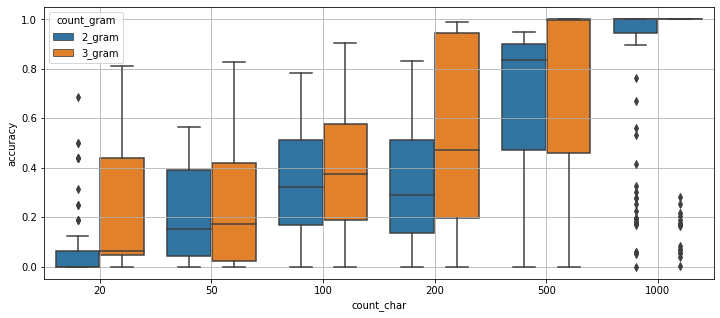

In [59]:
analyze_df = pd.read_csv('analyze_metropolis_hastings.csv')

plt.figure(figsize=(12, 5))
ax = sns.boxplot(x="count_char", y="accuracy", hue="count_gram",
                 data=analyze_df)
plt.grid()

##### Вывод

- триграммы делают точность более стабильной, которая растет с увеличением количесвтва символов в тесте. 
- точность по триграммам стабильно выше, чем по биграмма

### Задание 6 (бонус) 

Какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни (хотя встречаются! и это самое потрясающее во всей этой истории, но об этом я расскажу потом).

##### Ответ

Распределение букв в больших текстах подчиняется степенному закону. Можно распространить идею МСМС-семлирования на распределения, которые подчиняются степенному закону, т.е. те распределения, для которых уже наблюдается некая упрощенная зависимость и можно сделать эту зависимость более "глубокой".

Например:

Взято из Википедии: "Аллометрические закономерности для отношений между биологическими переменными являются одними из самых известных примеров степенных законов в природе." (Аллометрия - неравномерный рост частей тела)

Т.е. зная изменение размеров частей тела у животного можно корректно описать этапы эволюции этого животного